6 comb

* vectorization: 
    a. bow
    b. tfidf
    * feature selection
        a. chi2
        b. f-test
        c. mi
        models:
            # logistic: 1008 comb
            # svm: 2688
            # rf: 8000
            
            
total: 82560 combs
lots of 5 cross validation = g


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import re
from data_cleaning import *
import warnings

warnings.filterwarnings('ignore')

# 1. Preprocessing

In [6]:
# read data
train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

In [7]:
#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]
X_test_raw = [x[0] for x in test_data[['text']].values]

#### (1). data cleaning

In [8]:
# 1. data cleaning (optional)
X_train_need_to_clean = pd.DataFrame(X_train_raw)
X_test_need_to_clean = pd.DataFrame(X_test_raw)

# remove url, # and @
X_train_need_to_clean.replace("\b*https?:\S*", '', regex=True, inplace=True)
X_train_need_to_clean.replace("\b*@\S*", '', regex=True, inplace=True)
X_train_need_to_clean.replace("\b*#\S*", '', regex=True, inplace=True)
X_test_need_to_clean.replace("\b*https?:\S*", '', regex=True, inplace=True)
X_test_need_to_clean.replace("\b*@\S*", '', regex=True, inplace=True)
X_test_need_to_clean.replace("\b*#\S*", '', regex=True, inplace=True)

for i in range(X_train_need_to_clean.shape[0]):
    X_train_need_to_clean.loc[i, 0] = ' '.join(text_preprocessing(X_train_need_to_clean.loc[i, 0], remove_html=False))

for i in range(X_test_need_to_clean.shape[0]):
    X_test_need_to_clean.loc[i, 0] = ' '.join(text_preprocessing(X_test_need_to_clean.loc[i, 0], remove_html=False))    

X_train_need_to_clean.replace('[^\w\s]','', regex=True, inplace=True)
X_test_need_to_clean.replace('[^\w\s]','', regex=True, inplace=True)
    
    
X_train_clean = [x[0] for x in X_train_need_to_clean[[0]].values]
X_test_clean = [x[0] for x in X_test_need_to_clean[[0]].values]

#### (2). vectorization (transformation)

In [5]:
# bag of words
# countvectorizer
BoW_vectorizer = CountVectorizer(ngram_range=(2,2))

X_train_BoW = BoW_vectorizer.fit_transform(X_train_clean)
X_test_BoW = BoW_vectorizer.transform(X_test_clean)

X_train_tranformed, X_test_transformed = X_train_BoW, X_test_BoW

In [9]:
#TFIDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_clean)
X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)


### comparison between data with preprocessing and without preprocessing

In [13]:
CountVectorizer(ngram_range=(2,2)).fit_transform(X_train_raw).shape

(21802, 204657)

In [14]:
X_train_tranformed.shape

(21802, 127482)

# 2. feature selection

### type of selector (choose one of them)

In [ ]:
# chi2     
selector = SelectKBest(chi2,k=10000)
X_train_new = selector.fit_transform(X_train_tranformed,Y_train)
X_test_new = selector.transform(X_test_transformed)

In [ ]:
# f_classifs
selector = SelectKBest(f_classif,k=5000)
X_train_new = selector.fit_transform(X_train_tranformed,Y_train)
X_test_new = selector.transform(X_test_transformed)

In [ ]:
# mutual_info_classif
selector = SelectKBest(mutual_info_classif,k=10000)
X_train_new = selector.fit_transform(X_train_tranformed,Y_train)
X_test_new = selector.transform(X_test_transformed)

# 3. training

### split data for validation

In [288]:
train_size = X_train_tranformed.shape[0]
test_size = X_test_transformed.shape[0]
## random hold out
ts = test_size/train_size
X_train_s, X_validation, y_train_s, y_validation = train_test_split(X_train_new,Y_train, test_size=ts)

In [289]:
cv = round(X_train_s.shape[0] / X_validation.shape[0])

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state=om_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_, y_train_)

In [ ]:
X_train_s, y_train_s = X_resampled, y_resampled

## base model: 0R

In [237]:
clf = DummyClassifier(strategy='most_frequent')
basemodel = clf.fit(X_train_raw, Y_train)
print("base model score: ", basemodel.score(X_train_raw, Y_train))

base model score:  0.5806348041464086


In [240]:
from sklearn.linear_model import LinearRegression
linear_hyper = {
    'normalize': [True, False]
}
linear_model = LinearRegression().fit(X_train_s, y_train_s_numberise)
linear_model.score(X_validation, y_validation_numberise)


0.13170497278915505

In [241]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

## naive bayes

In [247]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

# gussian
gnb = GaussianNB()
gnb.fit(X_train_s.toarray(), y_train_s)
gnb.score(X_validation.toarray(), y_validation)
print("Gaussian: ", gnb.score(X_validation.toarray(), y_validation))

# multinomial
mnb = MultinomialNB()
mnb.fit(X_train_s.toarray(), y_train_s)
mnb.score(X_validation.toarray(), y_validation)
print("multinomial: ", mnb.score(X_validation.toarray(), y_validation))

# complement
cnb = ComplementNB()
cnb.fit(X_train_s.toarray(), y_train_s)
cnb.score(X_validation.toarray(), y_validation)
print("complement: ", cnb.score(X_validation.toarray(), y_validation))

# bernoulli
bnb = BernoulliNB()
bnb.fit(X_train_s.toarray(), y_train_s)
print("bernoulli: ", bnb.score(X_validation.toarray(), y_validation))

# # categorical
# canb = CategoricalNB()
# canb.fit(X_train_s.toarray(), y_train_s)
# canb.score(X_validation.toarray(), y_validation)
# print("categorical: ", canb.score(X_validation.toarray(), y_validation))

Gaussian:  0.6891293654697491
multinomial:  0.6369896704377767
complement:  0.397114281029677
bernoulli:  0.6317429086735531


## decision tree

In [248]:
from sklearn.tree import DecisionTreeClassifier

dt_hyper = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,20,2),
    'min_samples_leaf': range(1,10,1),
    'max_features': ['auto', 'log2']
}

# random method
search_dt = RandomizedSearchCV(DecisionTreeClassifier(), dt_hyper, scoring='accuracy', cv=cv, n_iter=800, n_jobs=-1)
dt_result = search_dt.fit(X_train_s, y_train_s)

## logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

logi_hyper = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'none', 'elasticnet'],
    'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

search_logi = RandomizedSearchCV(LogisticRegression(n_jobs=-1),logi_hyper, scoring='f1_weighted', cv=cv, n_iter=300, n_jobs=-1)
logi_result = search_logi.fit(X_train_s, y_train_s)

pd.DataFrame(logi_result.cv_results_)
print(logi_result.best_params_)
print(logi_result.best_score_)

NameError: name 'RandomizedSearchCV' is not defined

### SVM

In [250]:
from sklearn.svm import SVC

svm_hyper = {
    'degree': [3, 5, 10, 15],
    'gamma': [1,0.1,0.01,0.001],
    'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmod'],
    'max_iter': [100, 500, 1000],
    'decision_function_shape': ['ovo', 'ovr']
}

# random method
search_svm = RandomizedSearchCV(SVC(), svm_hyper, scoring='f1_weighted', cv=cv, n_iter=269)
svm_result = search_svm.fit(X_train_s, y_train_s)

pd.DataFrame(svm_result.cv_results_)
print(svm_result.best_params_)
print(svm_result.best_score_)

{'max_iter': 1000, 'kernel': 'rbf', 'gamma': 1, 'degree': 10, 'decision_function_shape': 'ovr', 'C': 1}
0.6240700139395764


### Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier

rf_hyper = {
    'n_estimators': [90, 100, 115 , 130],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,20,2),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,2),
    'max_features': ['auto', 'log2']
}

# random method
search_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), rf_hyper, scoring='f1_weighted', cv=cv, n_iter=800, n_jobs=-1)
rf_result = search_rf.fit(X_train_s, y_train_s)

pd.DataFrame(rf_result.cv_results_)
print(rf_result.best_params_)
print(rf_result.best_score_)

{'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 18, 'criterion': 'gini'}
0.43604695763910356


### Stacking

In [252]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

rf_model = RandomForestClassifier(criterion=rf_result.best_params_['criterion'], max_depth=rf_result.best_params_['max_depth'],
                                  max_features='log2', min_samples_leaf=rf_result.best_params_['min_samples_leaf'], 
                                  min_samples_split=rf_result.best_params_['min_samples_split'], n_estimators=rf_result.best_params_['n_estimators'],
                                  random_state=0).fit(X_train_s, y_train_s)

svm_model = SVC(degree=svm_result.best_params_['degree'], gamma=svm_result.best_params_['gamma'] ,C=svm_result.best_params_['C'], 
                kernel=svm_result.best_params_['kernel'], max_iter=svm_result.best_params_['max_iter'], 
                decision_function_shape=svm_result.best_params_['decision_function_shape']).fit(X_train_s, y_train_s)

logi_model = LogisticRegression(solver=logi_result.best_params_['solver'], penalty=logi_result.best_params_['penalty'],
                                C=logi_result.best_params_['C'], max_iter=logi_result.best_params_['max_iter'],
                                multi_class=logi_result.best_params_['multi_class']).fit(X_train_s, y_train_s)

estimators = [('rf', rf_model),('svr', svm_model), ('log', logi_model)]

In [253]:
dt_stacking = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(), n_jobs=-1).fit(X_train_s, y_train_s)
dt_stacking.score(X_validation, y_validation)

0.7483193966223971

In [254]:
svm_stacking = StackingClassifier(estimators=estimators, final_estimator=SVC(), n_jobs=-1).fit(X_train_s, y_train_s)
svm_stacking.score(X_validation, y_validation)

0.8027545499262174

In [255]:
logi_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=200), n_jobs=-1).fit(X_train_s, y_train_s)
logi_stacking.score(X_validation, y_validation)

0.8057058534185932

# 4. Evaluation

### score

In [269]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
from mlxtend.evaluate import bias_variance_decomp

# this function will take the model and datas, print the evaluation scores and output the precdtion

def evaluate_model(model_name: str, model, X_validation, y_validation, X_test_new, cv=5):
    # basestic
    print(f"{model_name}: ")

    # validation acc
    vc = np.mean(cross_val_score(model,X_validation, y_validation, cv=cv))
    print("Validation accuracy: ", vc)

    # predictions for test data
    prediction = model.predict(X_test_new)

    validation_label = model.predict(X_validation)

    # macro metrics
    precision_m = precision_score(y_validation,validation_label, average = 'macro')
    print('macro precision is ', precision_m)

    recall_m = recall_score(y_validation,validation_label, average = 'macro')
    print('macro recall is ', recall_m)

    # f1
    f1_m = f1_score(y_validation,validation_label, average = 'macro')
    print('macro f1 is ', f1_m)


    # weighted metrics
    precision_w = precision_score(y_validation,validation_label, average = 'weighted')
    print('weighted precision is ', precision_w)

    recall_w = recall_score(y_validation,validation_label, average = 'weighted')
    print('weighted recall is ', recall_w)

    # f1
    f1_w = f1_score(y_validation,validation_label, average = 'weighted')
    print('weighted f1 is ', f1_w)
    
#     preds_test = pd.DataFrame(convert_str_to_num(validation_label, convert_dict))
#     y_test = pd.DataFrame(convert_str_to_num(y_validation, convert_dict))
    
#     mean_pred_test = preds_test.mean(axis = 1)
    
#     mse = preds_test.apply(lambda pred_test: mean_squared_error(y_test, pred_test)).mean()

#     bias_squared = mean_squared_error(y_test, mean_pred_test)

#     variance = preds_test.apply(lambda pred_test: mean_squared_error(mean_pred_test, pred_test)).mean()
    
#     print(preds_test)
    
#     print(bias_squared)
#     print(variance)
    print()
    
    
    
    return prediction

## basic models

In [275]:
evaluate_model("basemodel 0R", basemodel, X_validation, y_validation,X_test_new)

# print(evaluate_model("guassian nb", gnb, X_validation.toarray(), y_validation_numberise, X_test_new.toarray()))

basemodel 0R: 
Validation accuracy:  0.5884570798423863
macro precision is  0.196152374706236
macro recall is  0.3333333333333333
macro f1 is  0.246972199284338
weighted precision is  0.34628178692606054
weighted recall is  0.588457124118708
weighted f1 is  0.4359976503844019



array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U7')

In [276]:
logi_label = evaluate_model("Logistic Regression", logi_model, X_validation, y_validation,X_test_new)
s_label = evaluate_model("SVM", svm_model, X_validation, y_validation,X_test_new)

Logistic Regression: 
Validation accuracy:  0.6461714116650304
macro precision is  0.7251146594815845
macro recall is  0.516540517255444
macro f1 is  0.5417164641430832
weighted precision is  0.70714378997272
weighted recall is  0.6892933267748811
weighted f1 is  0.6449050946271533

SVM: 
Validation accuracy:  0.7301191516830512
macro precision is  0.5765707772610517
macro recall is  0.6247243297428086
macro f1 is  0.5502153869561607
weighted precision is  0.6179789866946752
weighted recall is  0.7270044269552386
weighted f1 is  0.6300190847630931



### bagging models

In [277]:
rf_label = evaluate_model("random forest", rf_model, X_validation, y_validation,X_test_new)

random forest: 
Validation accuracy:  0.5884570798423863
macro precision is  0.196152374706236
macro recall is  0.3333333333333333
macro f1 is  0.246972199284338
weighted precision is  0.34628178692606054
weighted recall is  0.588457124118708
weighted f1 is  0.4359976503844019



### stacking

In [278]:
ss_label = evaluate_model("svm_stacking", svm_stacking, X_validation, y_validation,X_test_new)
dts_label = evaluate_model("dt_stacking", dt_stacking, X_validation, y_validation,X_test_new)
logi_s_label = evaluate_model("logi_stacking", logi_stacking, X_validation, y_validation,X_test_new)

svm_stacking: 
Validation accuracy:  0.7630756196290966
macro precision is  0.8349362304390908
macro recall is  0.7329362039287748
macro f1 is  0.7528894520624334
weighted precision is  0.809283035253802
weighted recall is  0.8027545499262174
weighted f1 is  0.7799687331131628

dt_stacking: 
Validation accuracy:  0.6589523796715933
macro precision is  0.7286571153894403
macro recall is  0.682313845870837
macro f1 is  0.6992491795102952
weighted precision is  0.7351489521566502
weighted recall is  0.7483193966223971
weighted f1 is  0.7361067896650644

logi_stacking: 
Validation accuracy:  0.7566813701098724
macro precision is  0.8298334275855686
macro recall is  0.7415214979660766
macro f1 is  0.7629306515690898
weighted precision is  0.807575171215516
weighted recall is  0.8057058534185932
weighted f1 is  0.7872715109689494



# 5. Error Analysis

In [279]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

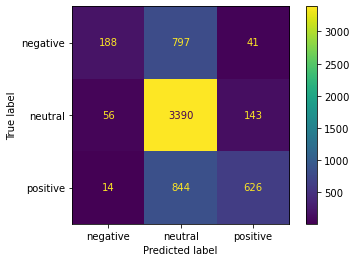

In [280]:
# logistic regression
plot_confusion_matrix(logi_model, X_validation, y_validation)
plt.show()

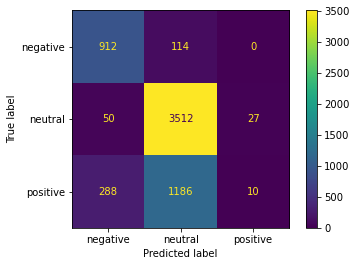

In [281]:
# svm
plot_confusion_matrix(svm_model, X_validation, y_validation)
plt.show()

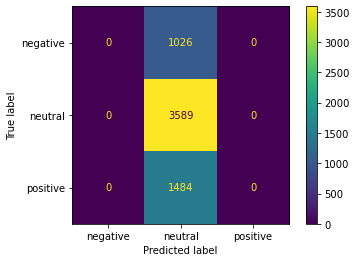

In [282]:
# random forest
plot_confusion_matrix(rf_model, X_validation, y_validation)
plt.show()

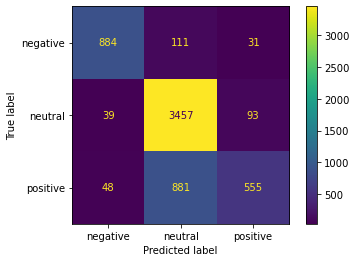

In [283]:
# svm_stacking
plot_confusion_matrix(svm_stacking, X_validation, y_validation)
plt.show()


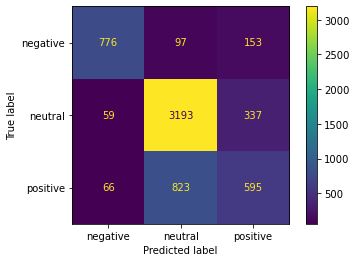

In [284]:
# dt_stacking
plot_confusion_matrix(dt_stacking, X_validation, y_validation)
plt.show()

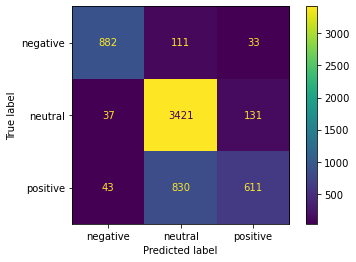

In [285]:
# logi_stacking
plot_confusion_matrix(logi_stacking, X_validation, y_validation)
plt.show()

## output

In [286]:
import csv
prediction_label = ss_label
with open('prediction.csv','w') as output:
    output.write("id,sentiment\n")
    for i in range(0,len(prediction_label)):
        output.write(str(test_data['id'].iloc[i]))
        output.write(",")
        output.write(prediction_label[i])
        output.write('\n')

In [83]:
len(y_train_s)

7971

In [67]:
X_train_s

<8079x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 11927 stored elements in Compressed Sparse Row format>